In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
#Reading dataset
train=pd.read_csv("Trainh.csv",sep=';')

In [2]:

train.head()

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0


In [3]:
#checking for null values
train.isnull().sum()

EmployeeID                    0
Target                        0
Age                         607
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                  49
MaritalStatus               234
MicromanagedAtWork          138
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears           333
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany              333
YearsSinceLastPromotion     333
YearsWithCurrManager        333
dtype: int64

In [4]:
train[["Age","LeavesTaken","MicromanagedAtWork","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].mean()

Age                        38.966413
LeavesTaken                10.914175
MicromanagedAtWork          3.001954
TotalWorkingYears           9.205464
YearsAtCompany              4.557669
YearsSinceLastPromotion     1.785792
YearsWithCurrManager        2.017872
dtype: float64

In [5]:
train["Gender"].value_counts()

Female    7827
Male      7825
Name: Gender, dtype: int64

In [6]:
train.fillna(train.mean(),inplace=True)

In [7]:
train.isnull().sum()

EmployeeID                    0
Target                        0
Age                           0
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                   0
MaritalStatus               234
MicromanagedAtWork            0
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [8]:
train[["Gender","HasFlexibleTimings","IsIndividualContributor","JobRole","MaritalStatus","WorkLoadLevel"]].mode()

,Gender,HasFlexibleTimings,IsIndividualContributor,JobRole,MaritalStatus,WorkLoadLevel
0,Female,No,Yes,Sales Executive,Divorced,High


In [9]:
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

In [10]:
train.isnull().sum()

EmployeeID                  0
Target                      0
Age                         0
AvgDailyHours               0
Department                  0
Education                   0
EducationField              0
Gender                      0
HasFlexibleTimings          0
IsIndividualContributor     0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
LeavesTaken                 0
MaritalStatus               0
MicromanagedAtWork          0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
RemoteWorkSatistfaction     0
SelfMotivationLevel         0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
WorkLoadLevel               0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<IPython.core.display.Javascript object>

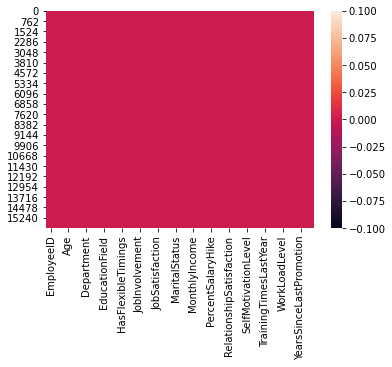

In [11]:
sns.heatmap(train.isnull())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

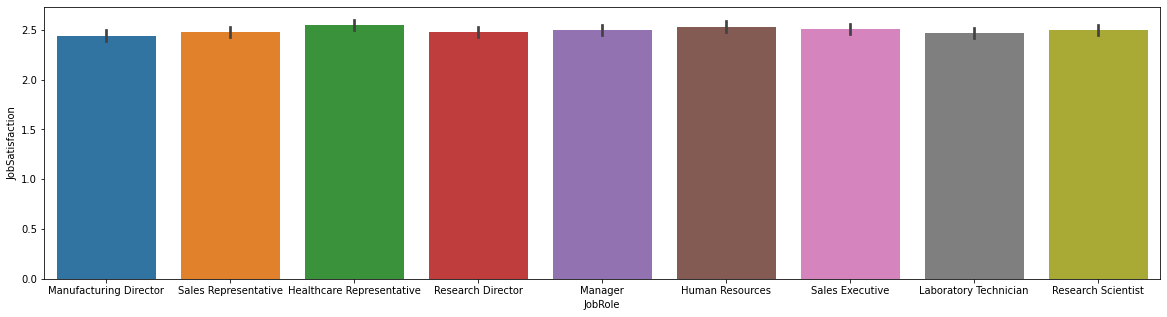

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(x="JobRole",y="JobSatisfaction",data=train)

In [13]:
train["JobRole"].value_counts()

Sales Executive              2149
Laboratory Technician        1760
Manager                      1748
Research Director            1738
Manufacturing Director       1736
Human Resources              1735
Research Scientist           1733
Sales Representative         1711
Healthcare Representative    1690
Name: JobRole, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

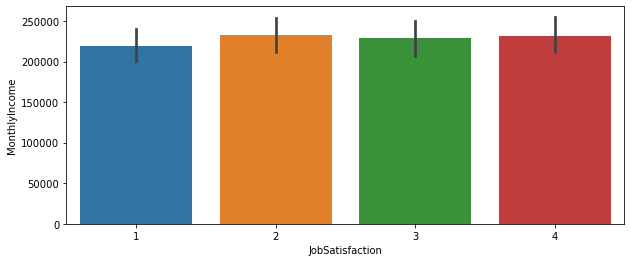

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x="JobSatisfaction",y="MonthlyIncome",data=train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

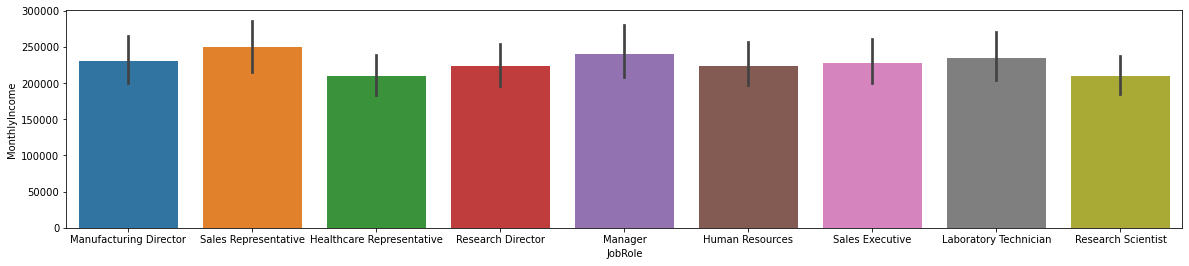

In [15]:
plt.figure(figsize=(20,4))
sns.barplot(x="JobRole",y="MonthlyIncome",data=train)

In [16]:
train["Age"].value_counts().head()

38.966413    607
29.000000    409
23.000000    401
24.000000    396
40.000000    387
Name: Age, dtype: int64

In [17]:
X_num=train.iloc[:,[0,2,3,5,10,12,13,15,16,17,18,19,20,22,23,24,25,27,28,29]]

In [18]:
X_num.head()

,EmployeeID,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,36.0,6.45,5,1,2,7.0,3.0,175000,4,21,1,1,3,8.0,2,2,8.0,1.0,8.0
1,100002,24.0,8.48,5,1,4,9.0,4.0,16667,1,11,3,1,2,1.0,5,2,0.0,0.0,0.0
2,100003,45.0,6.93,2,3,4,24.0,4.0,350000,4,19,4,4,1,17.0,6,4,17.0,4.0,10.0
3,100004,29.0,7.10,4,4,1,7.0,2.0,25000,1,25,3,4,2,2.0,0,2,1.0,1.0,1.0
4,100005,30.0,7.30,3,2,4,9.0,5.0,166667,2,20,4,1,4,9.0,6,1,3.0,3.0,0.0


In [19]:
y_cat=train.iloc[:,[4,6,7,8,9,11,14,21,26]]

In [20]:
y_cat.head()

,Department,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,JobRole,MaritalStatus,RemoteWorkSatistfaction,WorkLoadLevel
0,Sales,Technical Degree,Male,No,Yes,Manufacturing Director,Divorced,Medium,Low
1,Sales,Technical Degree,Male,No,Yes,Sales Representative,Married,Very High,High
2,Research & Development,Technical Degree,Female,No,Yes,Manufacturing Director,Married,High,Low
3,Sales,Medical,Male,No,No,Manufacturing Director,Single,Medium,High
4,Human Resources,Life Sciences,Female,No,Yes,Healthcare Representative,Single,Very High,Medium


In [21]:
X_num.shape

(16000, 20)

In [22]:
y_cat.shape

(16000, 9)

In [23]:
train.shape

(16000, 30)

In [24]:
print(train["EducationField"].unique())

['Technical Degree' 'Medical' 'Life Sciences' 'Marketing'
 'Human Resources' 'Other']


In [25]:
train["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [26]:
train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
train["JobRole"].unique()

array(['Manufacturing Director', 'Sales Representative',
       'Healthcare Representative', 'Research Director', 'Manager',
       'Human Resources', 'Sales Executive', 'Laboratory Technician',
       'Research Scientist'], dtype=object)

In [28]:
train["MaritalStatus"].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [29]:
train["RemoteWorkSatistfaction"].unique()

array(['Medium', 'Very High', 'High', 'Low', 'Very Low'], dtype=object)

In [30]:
train["WorkLoadLevel"].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [31]:
print(train["HasFlexibleTimings"].value_counts())

No     10775
Yes     5225
Name: HasFlexibleTimings, dtype: int64


In [32]:
print(train["IsIndividualContributor"].value_counts())

Yes    8244
No     7756
Name: IsIndividualContributor, dtype: int64


In [33]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X_num)

In [34]:
standardized_X

array([[-1.73194256, -0.24459007, -0.72185123, ...,  0.59315245,
        -0.4682794 ,  2.47620414],
       [-1.73172605, -1.23402768,  0.38921277, ..., -0.78533776,
        -1.06421259, -0.83526512],
       [-1.73150955,  0.49748813, -0.45913659, ...,  2.14395393,
         1.31952015,  3.30407145],
       ...,
       [ 1.73150955, -1.06912141, -0.68353868, ..., -0.61302648,
        -0.4682794 , -0.42133146],
       [ 1.73172605, -0.82176201, -0.90794077, ..., -0.61302648,
        -0.4682794 , -0.42133146],
       [ 1.73194256,  0.1676756 ,  1.23756212, ..., -0.78533776,
        -1.06421259, -0.83526512]])

In [35]:
train.head()

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,High,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0


In [36]:
y_true='Target'
y_score='predictions'

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:


# Import label encoder 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

p=train['Gender']= label_encoder.fit_transform(train['Gender'])
q=train['Department']= label_encoder.fit_transform(train['Department']) 
r=train['EducationField']=label_encoder.fit_transform(train['EducationField']) 
s=train['HasFlexibleTimings']= label_encoder.fit_transform(train['HasFlexibleTimings'])
t=train['IsIndividualContributor']= label_encoder.fit_transform(train['IsIndividualContributor']) 
u=train['JobRole']= label_encoder.fit_transform(train['JobRole']) 
a=train['WorkLoadLevel']= label_encoder.fit_transform(train['WorkLoadLevel'])
v=train['MaritalStatus']= label_encoder.fit_transform(train['MaritalStatus']) 
b=train['RemoteWorkSatistfaction']= label_encoder.fit_transform(train['RemoteWorkSatistfaction']) 


In [39]:
p,q,r,s,t,u,v,a,b

(array([1, 1, 0, ..., 0, 0, 1]),
 array([2, 2, 1, ..., 0, 1, 0]),
 array([5, 5, 5, ..., 4, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([1, 1, 1, ..., 1, 0, 0]),
 array([4, 8, 4, ..., 6, 0, 6]),
 array([0, 1, 1, ..., 2, 1, 2]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([2, 3, 0, ..., 0, 0, 2]))

In [40]:
train.head()

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,2,5,5,1,0,1,...,1,2,3,8.0,2,2,1,8.0,1.0,8.0
1,100002,0,24.0,8.48,2,5,5,1,0,1,...,1,3,2,1.0,5,2,0,0.0,0.0,0.0
2,100003,0,45.0,6.93,1,2,5,0,0,1,...,4,0,1,17.0,6,4,1,17.0,4.0,10.0
3,100004,1,29.0,7.10,2,4,3,1,0,0,...,4,2,2,2.0,0,2,0,1.0,1.0,1.0
4,100005,0,30.0,7.30,0,3,1,0,0,1,...,1,3,4,9.0,6,1,2,3.0,3.0,0.0


In [41]:
standardized_X

array([[-1.73194256, -0.24459007, -0.72185123, ...,  0.59315245,
        -0.4682794 ,  2.47620414],
       [-1.73172605, -1.23402768,  0.38921277, ..., -0.78533776,
        -1.06421259, -0.83526512],
       [-1.73150955,  0.49748813, -0.45913659, ...,  2.14395393,
         1.31952015,  3.30407145],
       ...,
       [ 1.73150955, -1.06912141, -0.68353868, ..., -0.61302648,
        -0.4682794 , -0.42133146],
       [ 1.73172605, -0.82176201, -0.90794077, ..., -0.61302648,
        -0.4682794 , -0.42133146],
       [ 1.73194256,  0.1676756 ,  1.23756212, ..., -0.78533776,
        -1.06421259, -0.83526512]])

In [42]:
df = pd.DataFrame(standardized_X)

<IPython.core.display.Javascript object>

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.731943,-0.244590,-0.721851,1.416632,-1.344624,-0.443422,-0.607852,-0.001389,-0.078780,1.669281,0.910447,-1.337521,-1.336303,0.457882,-0.137110,-0.501332,-0.448454,0.593152,-0.468279,2.476204
1,-1.731726,-1.234028,0.389213,1.416632,-1.344624,1.348409,-0.297262,0.709135,-0.313931,-0.672474,-0.911541,0.453152,-1.336303,-0.436418,-0.933292,0.996205,-0.448454,-0.785338,-1.064213,-0.835265
2,-1.731510,0.497488,-0.459137,-0.709712,0.437441,1.348409,2.032163,0.709135,0.181125,1.669281,0.546050,1.348489,1.345802,-1.330718,0.886553,1.495384,1.348506,2.143954,1.319520,3.304071
3,-1.731293,-0.821762,-0.366092,0.707851,1.328474,-1.339338,-0.607852,-0.711913,-0.301555,-0.672474,1.639243,0.453152,1.345802,-0.436418,-0.819551,-1.499690,-0.448454,-0.613026,-0.468279,-0.421331
4,-1.731077,-0.739309,-0.256627,-0.000930,-0.453591,1.348409,-0.297262,1.419659,-0.091156,0.108111,0.728249,1.348489,-1.336303,1.352181,-0.023369,1.495384,-1.346933,-0.268404,0.723587,-0.835265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.731077,-1.646293,-0.524815,-0.709712,-1.344624,1.348409,-0.452557,0.709135,-0.313931,-0.672474,-0.364944,-0.442184,0.451767,-0.436418,-1.047032,-0.002153,-1.346933,-0.785338,-1.064213,-0.835265
15996,1.731293,1.404473,-0.092431,-0.709712,-0.453591,0.452494,0.479213,-0.711913,-0.128285,-0.672474,0.181652,1.348489,-0.442268,-0.436418,-0.250850,-0.501332,-1.346933,0.248530,0.127654,-0.007398
15997,1.731510,-1.069121,-0.683539,-1.418493,1.328474,1.348409,-0.607852,-0.711913,-0.165414,-0.672474,-1.640336,-0.442184,0.451767,1.352181,-0.478330,-0.002153,1.348506,-0.613026,-0.468279,-0.421331
15998,1.731726,-0.821762,-0.907941,0.707851,1.328474,-0.443422,-0.452557,-0.711913,-0.078780,0.888696,-1.640336,1.348489,-1.336303,-0.436418,-0.364590,-0.002153,-1.346933,-0.613026,-0.468279,-0.421331


In [44]:
D=[p,q,r,s,t,u,v,a,b]

In [45]:
D

[array([1, 1, 0, ..., 0, 0, 1]),
 array([2, 2, 1, ..., 0, 1, 0]),
 array([5, 5, 5, ..., 4, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([1, 1, 1, ..., 1, 0, 0]),
 array([4, 8, 4, ..., 6, 0, 6]),
 array([0, 1, 1, ..., 2, 1, 2]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([2, 3, 0, ..., 0, 0, 2])]

In [46]:
fg=pd.DataFrame(D)

<IPython.core.display.Javascript object>

In [47]:
fg

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,1,1,0,1,0,1,1,1,0,1,...,0,1,1,1,0,1,0,0,0,1
1,2,2,1,2,0,2,1,2,1,2,...,2,2,2,0,1,2,2,0,1,0
2,5,5,5,3,1,3,2,0,0,0,...,4,2,2,0,4,4,5,4,0,0
3,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,1,0,0,1,0
4,1,1,1,0,1,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
5,4,8,4,4,0,5,5,5,3,1,...,1,8,6,3,4,3,7,6,0,6
6,0,1,1,2,2,0,2,2,1,2,...,1,2,0,2,1,0,2,2,1,2
7,1,0,1,0,2,0,1,2,0,2,...,1,0,1,0,1,0,2,0,0,0
8,2,3,0,2,3,0,3,0,1,4,...,1,2,0,2,3,0,1,0,0,2


In [48]:
fd=fg.transpose()

In [49]:
fd

,0,1,2,3,4,5,6,7,8
0,1,2,5,0,1,4,0,1,2
1,1,2,5,0,1,8,1,0,3
2,0,1,5,0,1,4,1,1,0
3,1,2,3,0,0,4,2,0,2
4,0,0,1,0,1,0,2,2,3
...,...,...,...,...,...,...,...,...,...
15995,1,2,4,1,1,3,0,0,0
15996,0,2,5,0,0,7,2,2,1
15997,0,0,4,0,1,6,2,0,0
15998,0,1,0,1,0,0,1,0,0


In [50]:
df1=pd.merge(df, fd, left_index=True, right_index=True, how='outer')

<IPython.core.display.Javascript object>

In [51]:
df1

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9,...,19,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y
0,-1.731943,-0.244590,-0.721851,1.416632,-1.344624,-0.443422,-0.607852,-0.001389,-0.078780,1.669281,...,2.476204,1,2,5,0,1,4,0,1,2
1,-1.731726,-1.234028,0.389213,1.416632,-1.344624,1.348409,-0.297262,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,5,0,1,8,1,0,3
2,-1.731510,0.497488,-0.459137,-0.709712,0.437441,1.348409,2.032163,0.709135,0.181125,1.669281,...,3.304071,0,1,5,0,1,4,1,1,0
3,-1.731293,-0.821762,-0.366092,0.707851,1.328474,-1.339338,-0.607852,-0.711913,-0.301555,-0.672474,...,-0.421331,1,2,3,0,0,4,2,0,2
4,-1.731077,-0.739309,-0.256627,-0.000930,-0.453591,1.348409,-0.297262,1.419659,-0.091156,0.108111,...,-0.835265,0,0,1,0,1,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.731077,-1.646293,-0.524815,-0.709712,-1.344624,1.348409,-0.452557,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,4,1,1,3,0,0,0
15996,1.731293,1.404473,-0.092431,-0.709712,-0.453591,0.452494,0.479213,-0.711913,-0.128285,-0.672474,...,-0.007398,0,2,5,0,0,7,2,2,1
15997,1.731510,-1.069121,-0.683539,-1.418493,1.328474,1.348409,-0.607852,-0.711913,-0.165414,-0.672474,...,-0.421331,0,0,4,0,1,6,2,0,0
15998,1.731726,-0.821762,-0.907941,0.707851,1.328474,-0.443422,-0.452557,-0.711913,-0.078780,0.888696,...,-0.421331,0,1,0,1,0,0,1,0,0


In [52]:
df1.columns

Index(['0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x',     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,    19,
       '0_y', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y'],
      dtype='object')

In [53]:
X = df1.rename({'0_x':'0','1_x':'1','2_x':'2','3_x':'3','4_x':'4','5_x':'5','6_x':'6','7_x':'7','8_x':'8','0_y':'21','1_y':'22','2_y':'23','3_y':'24','4_y':'25','5_y':'26','6_y':'27','7_y':'28','8_y':'29'}, axis=1)  # new method

In [54]:
X

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,29
0,-1.731943,-0.244590,-0.721851,1.416632,-1.344624,-0.443422,-0.607852,-0.001389,-0.078780,1.669281,...,2.476204,1,2,5,0,1,4,0,1,2
1,-1.731726,-1.234028,0.389213,1.416632,-1.344624,1.348409,-0.297262,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,5,0,1,8,1,0,3
2,-1.731510,0.497488,-0.459137,-0.709712,0.437441,1.348409,2.032163,0.709135,0.181125,1.669281,...,3.304071,0,1,5,0,1,4,1,1,0
3,-1.731293,-0.821762,-0.366092,0.707851,1.328474,-1.339338,-0.607852,-0.711913,-0.301555,-0.672474,...,-0.421331,1,2,3,0,0,4,2,0,2
4,-1.731077,-0.739309,-0.256627,-0.000930,-0.453591,1.348409,-0.297262,1.419659,-0.091156,0.108111,...,-0.835265,0,0,1,0,1,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.731077,-1.646293,-0.524815,-0.709712,-1.344624,1.348409,-0.452557,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,4,1,1,3,0,0,0
15996,1.731293,1.404473,-0.092431,-0.709712,-0.453591,0.452494,0.479213,-0.711913,-0.128285,-0.672474,...,-0.007398,0,2,5,0,0,7,2,2,1
15997,1.731510,-1.069121,-0.683539,-1.418493,1.328474,1.348409,-0.607852,-0.711913,-0.165414,-0.672474,...,-0.421331,0,0,4,0,1,6,2,0,0
15998,1.731726,-0.821762,-0.907941,0.707851,1.328474,-0.443422,-0.452557,-0.711913,-0.078780,0.888696,...,-0.421331,0,1,0,1,0,0,1,0,0


In [55]:
X.columns

Index([ '0',  '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19, '21', '22', '23', '24',
       '25', '26', '27', '28', '29'],
      dtype='object')

In [56]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,29
0,-1.731943,-0.244590,-0.721851,1.416632,-1.344624,-0.443422,-0.607852,-0.001389,-0.078780,1.669281,...,2.476204,1,2,5,0,1,4,0,1,2
1,-1.731726,-1.234028,0.389213,1.416632,-1.344624,1.348409,-0.297262,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,5,0,1,8,1,0,3
2,-1.731510,0.497488,-0.459137,-0.709712,0.437441,1.348409,2.032163,0.709135,0.181125,1.669281,...,3.304071,0,1,5,0,1,4,1,1,0
3,-1.731293,-0.821762,-0.366092,0.707851,1.328474,-1.339338,-0.607852,-0.711913,-0.301555,-0.672474,...,-0.421331,1,2,3,0,0,4,2,0,2
4,-1.731077,-0.739309,-0.256627,-0.000930,-0.453591,1.348409,-0.297262,1.419659,-0.091156,0.108111,...,-0.835265,0,0,1,0,1,0,2,2,3


In [57]:
y=train.Target

In [58]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

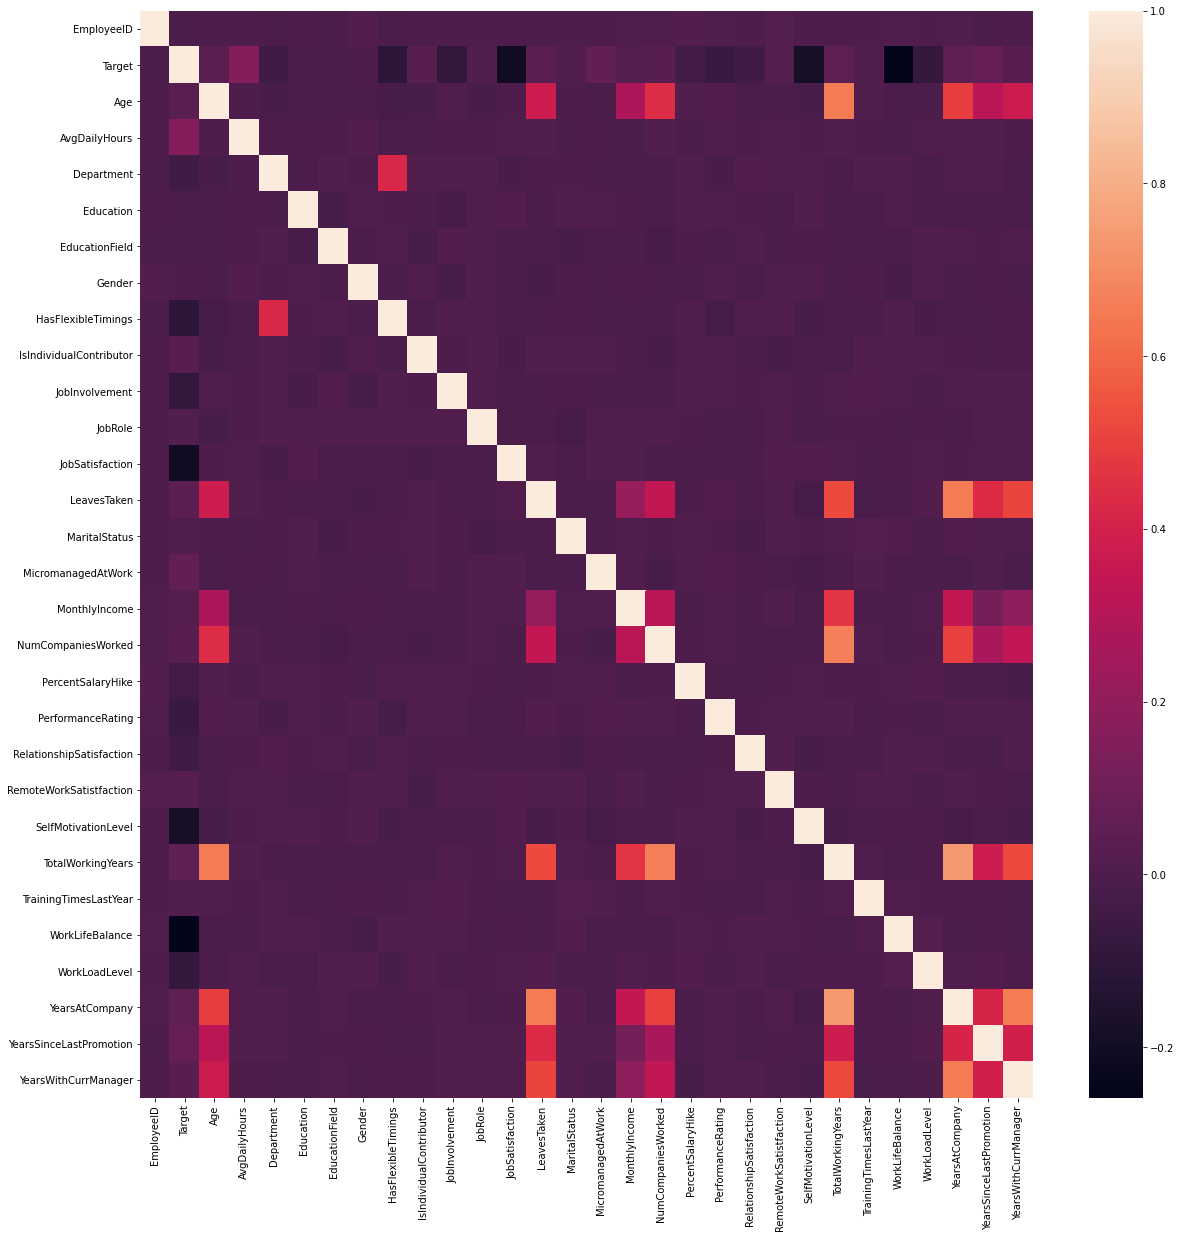

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

In [60]:
train.shape

(16000, 30)

# Univariate analysis

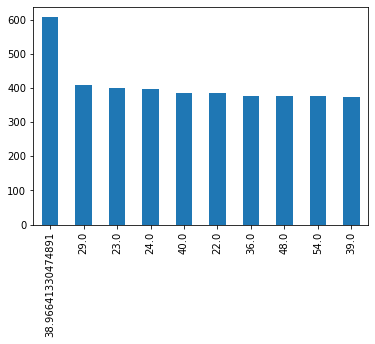

In [61]:
train['Age'].value_counts().head(10).plot.bar()

<IPython.core.display.Javascript object>

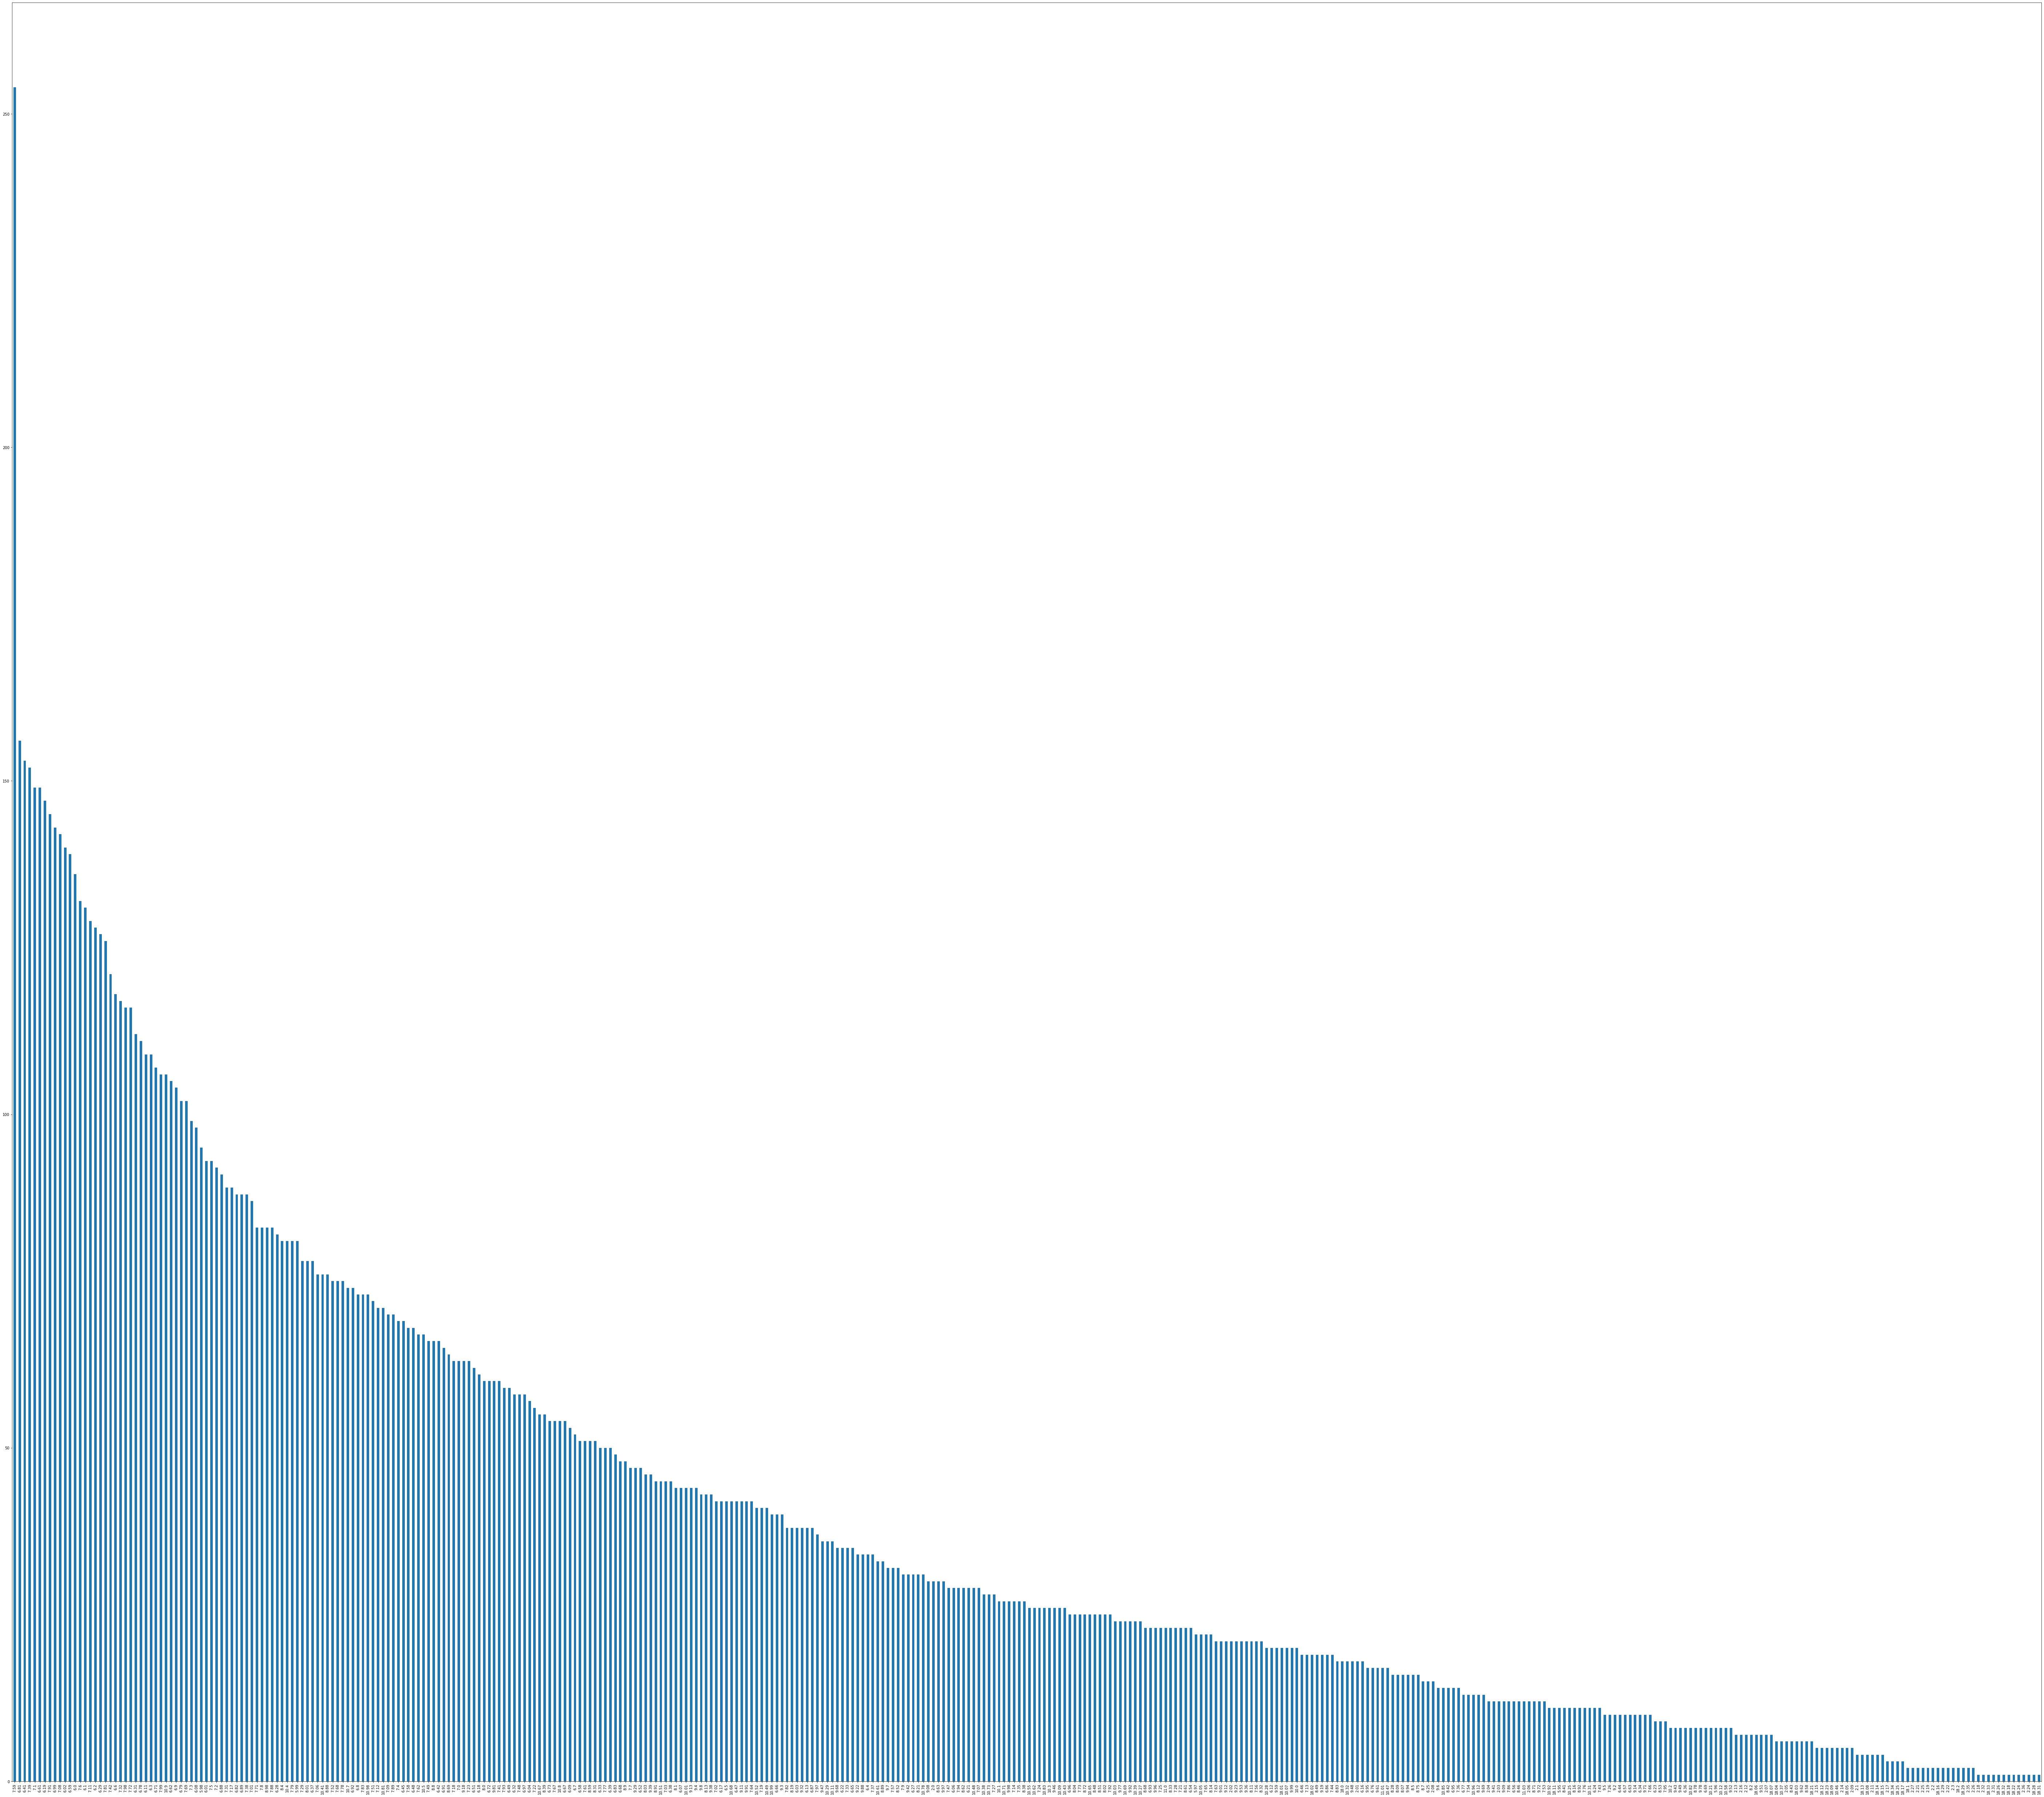

In [62]:
plt.figure(figsize=(100,90))
train['AvgDailyHours'].value_counts().plot.bar()

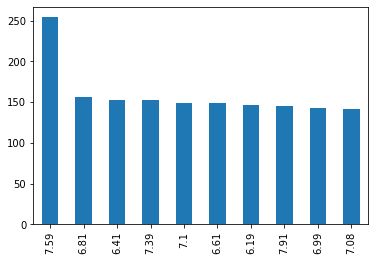

In [63]:

train['AvgDailyHours'].value_counts().head(10).plot.bar()

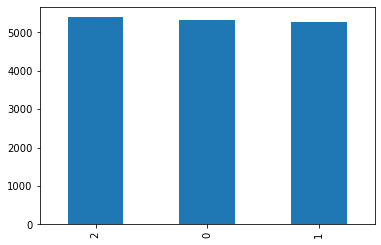

In [64]:
train['Department'].value_counts().head(10).plot.bar()

In [65]:
train["Department"].unique() #0-


array([2, 1, 0])

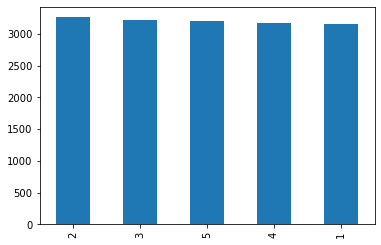

In [66]:
train['Education'].value_counts().head(10).plot.bar()

In [67]:
train['Education'].unique() 

array([5, 2, 4, 3, 1], dtype=int64)

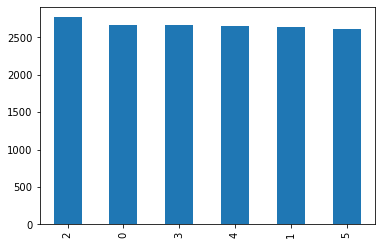

In [68]:
train['EducationField'].value_counts().plot.bar()

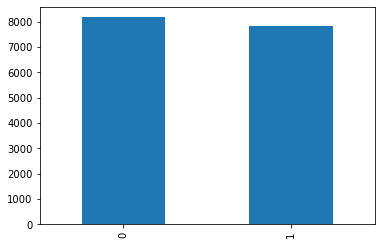

In [69]:
train['Gender'].value_counts().plot.bar()

<IPython.core.display.Javascript object>

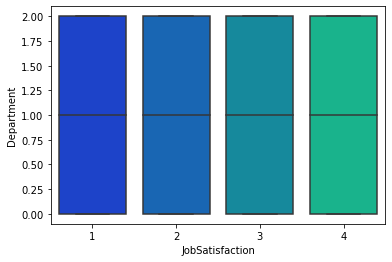

In [70]:

sns.boxplot(x='JobSatisfaction',y='Department',data=train,palette='winter')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

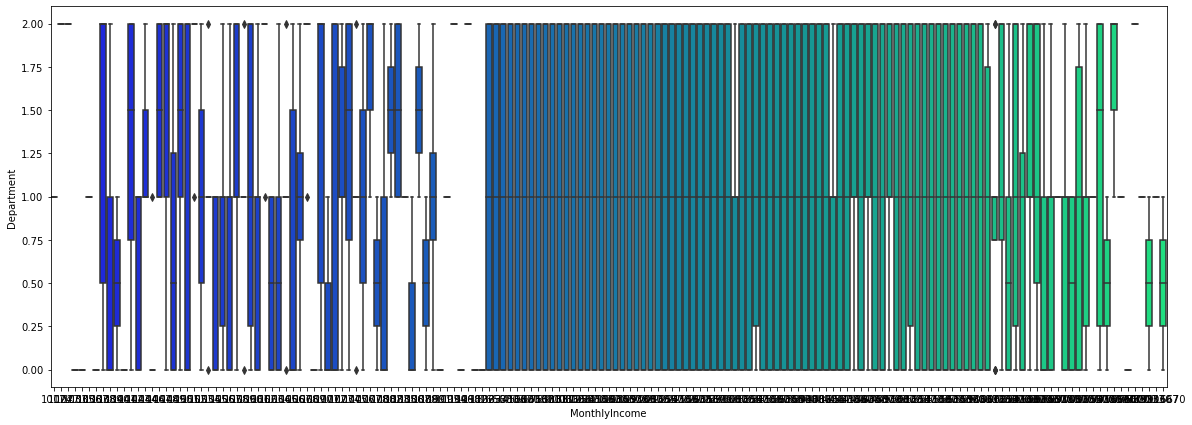

In [71]:
plt.figure(figsize=(20,7))
sns.boxplot(x='MonthlyIncome',y='Department',data=train,palette='winter')

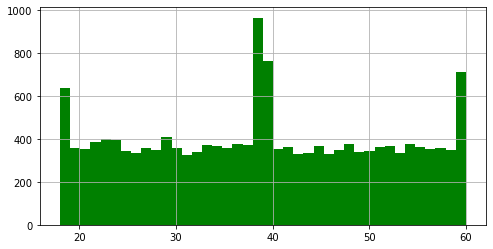

In [72]:
train['Age'].hist(color='green',bins=40,figsize=(8,4))


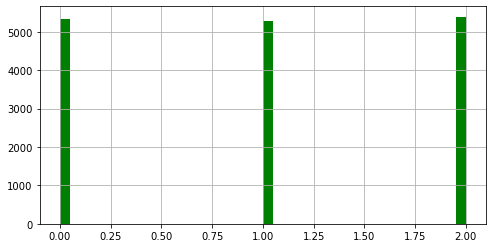

In [73]:
train['Department'].hist(color='green',bins=40,figsize=(8,4))


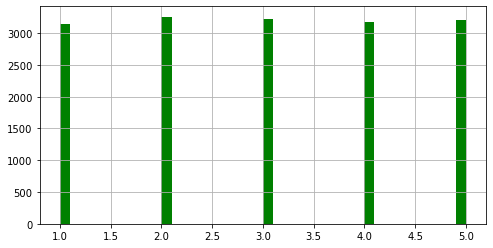

In [74]:
train['Education'].hist(color='green',bins=40,figsize=(8,4))


<IPython.core.display.Javascript object>

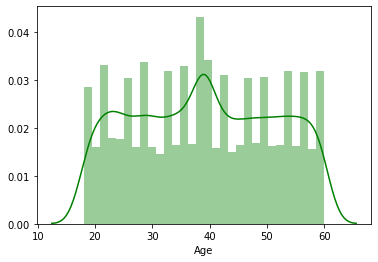

In [75]:
sns.distplot(train['Age'],kde=True,color='green',bins=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

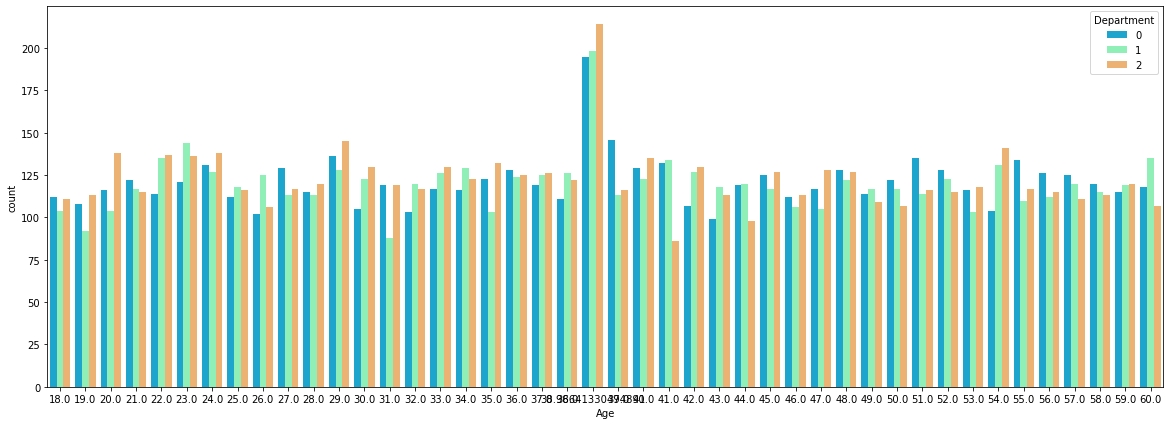

In [76]:
plt.figure(figsize=(20,7))
sns.countplot(x='Age',hue='Department',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

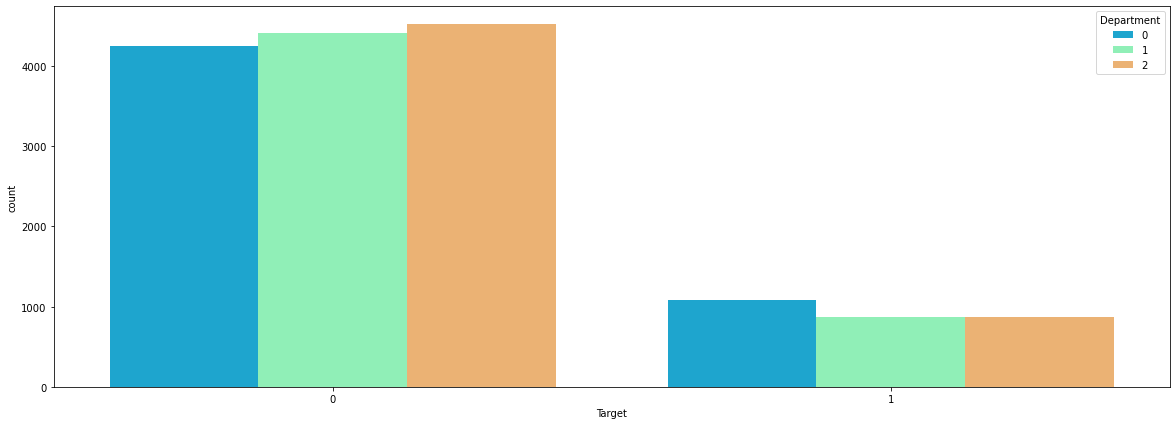

In [77]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='Department',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

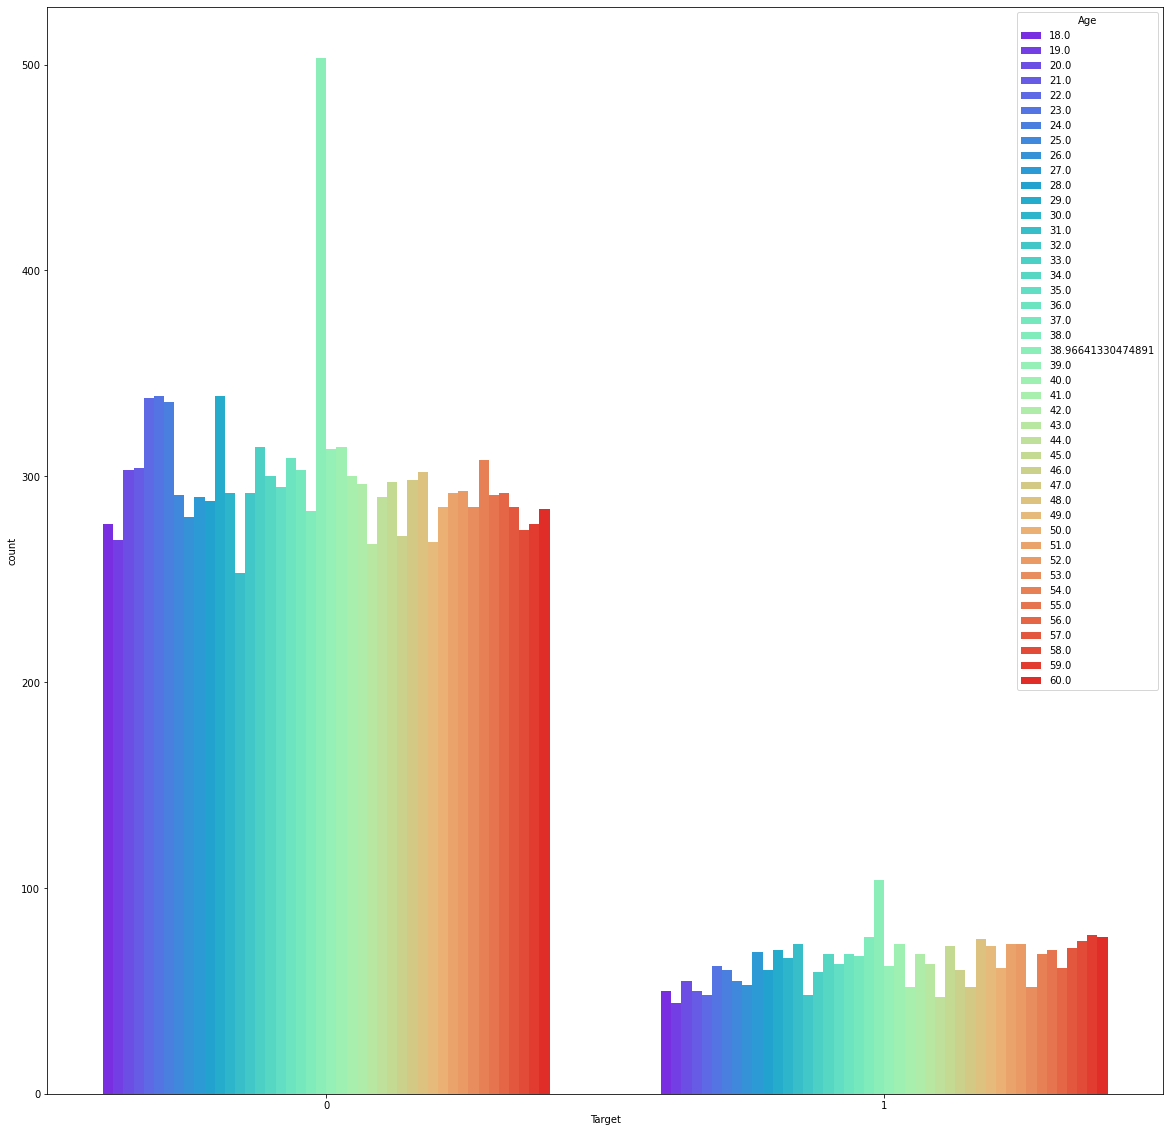

In [78]:
plt.figure(figsize=(20,20))
sns.countplot(x='Target',hue='Age',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

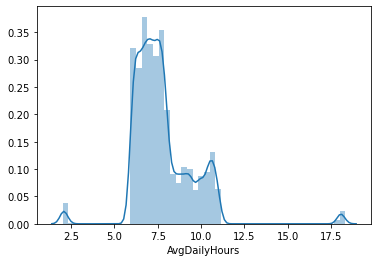

In [79]:
sns.distplot(train['AvgDailyHours'])

<IPython.core.display.Javascript object>

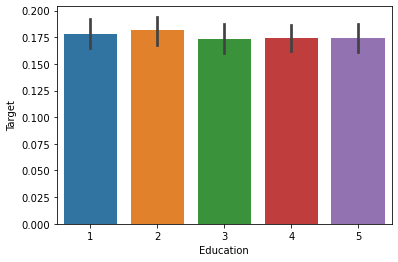

In [80]:
sns.barplot(x='Education',y='Target',data=train)

<IPython.core.display.Javascript object>

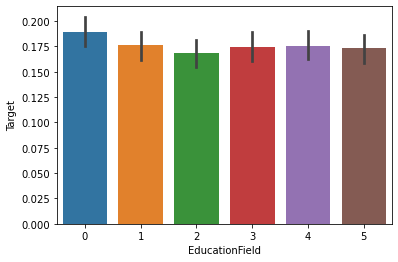

In [81]:
sns.barplot(x='EducationField',y='Target',data=train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

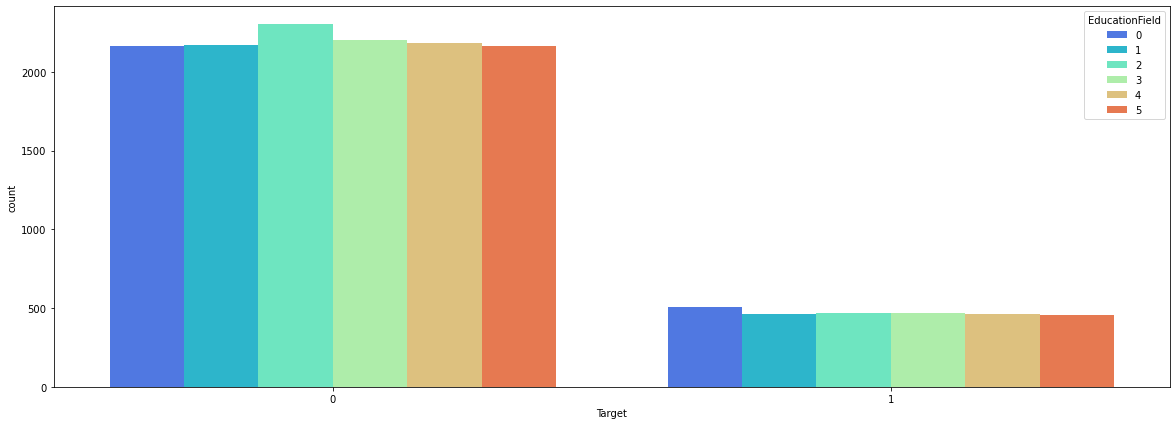

In [82]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='EducationField',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

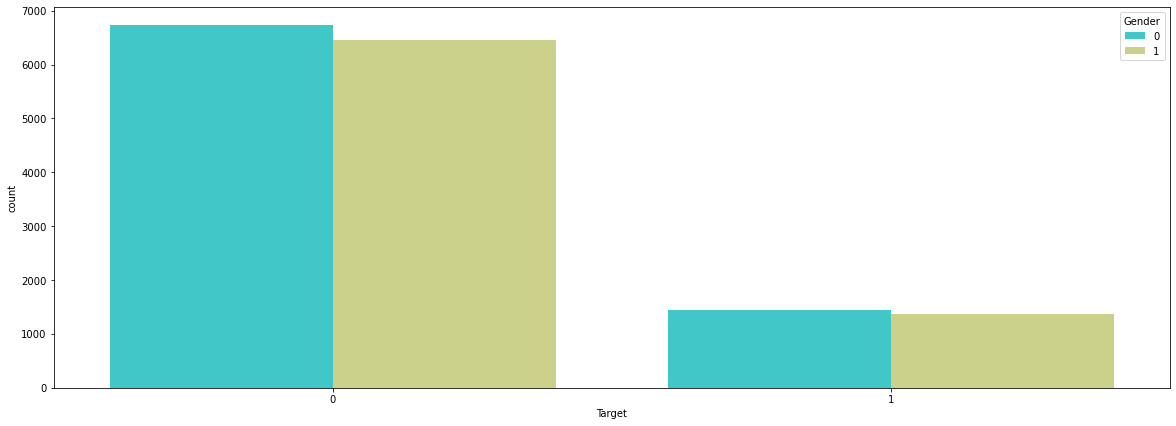

In [83]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='Gender',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

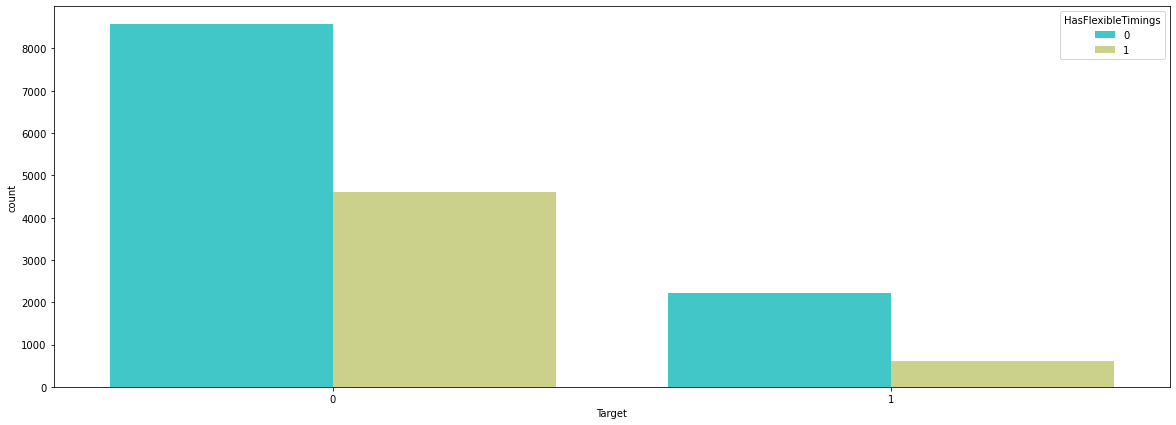

In [84]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='HasFlexibleTimings',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

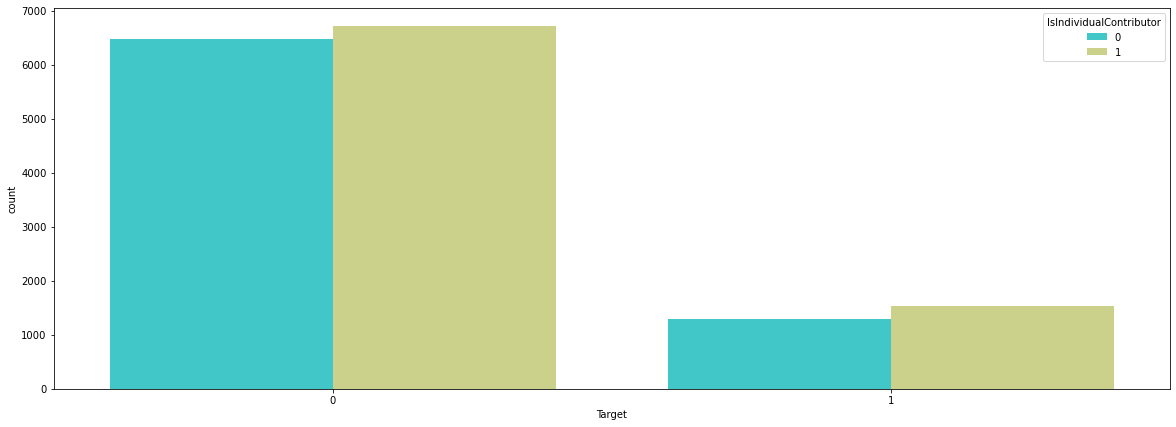

In [85]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='IsIndividualContributor',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

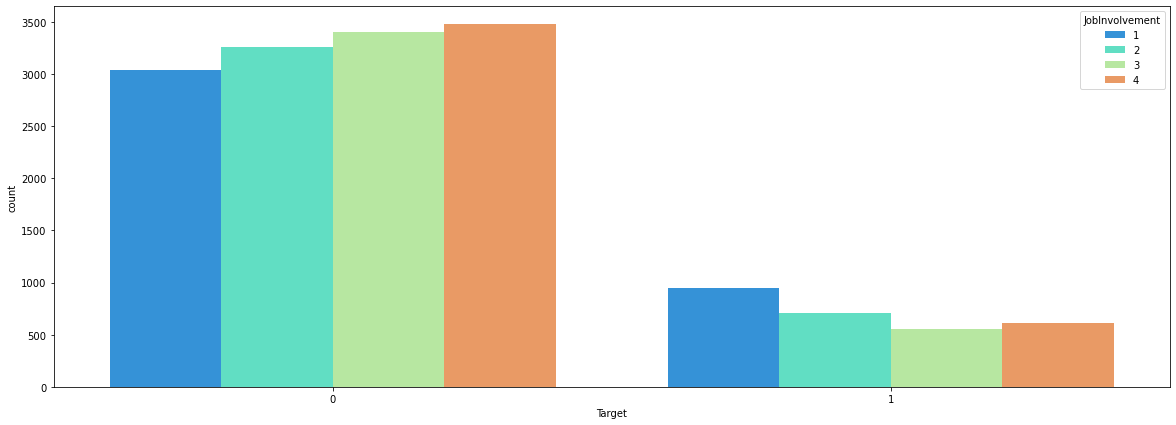

In [86]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='JobInvolvement',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

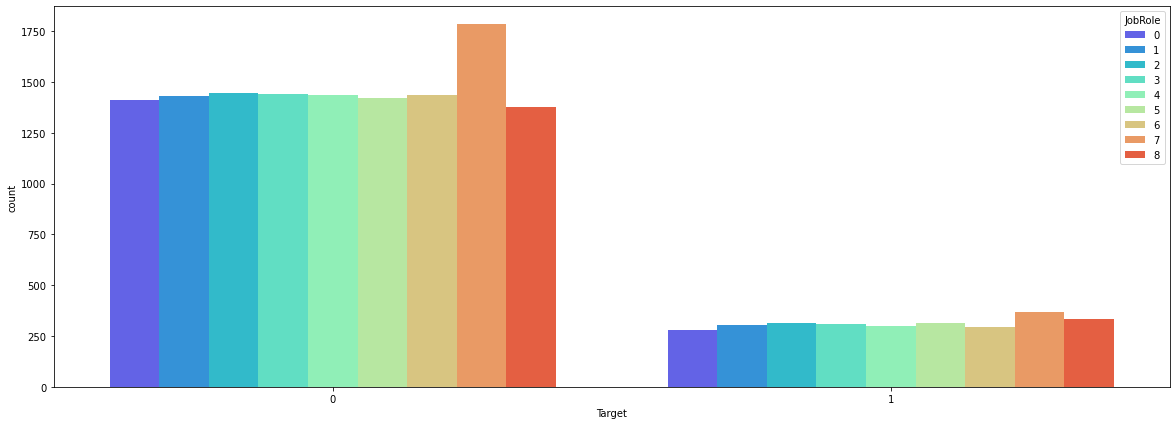

In [87]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='JobRole',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

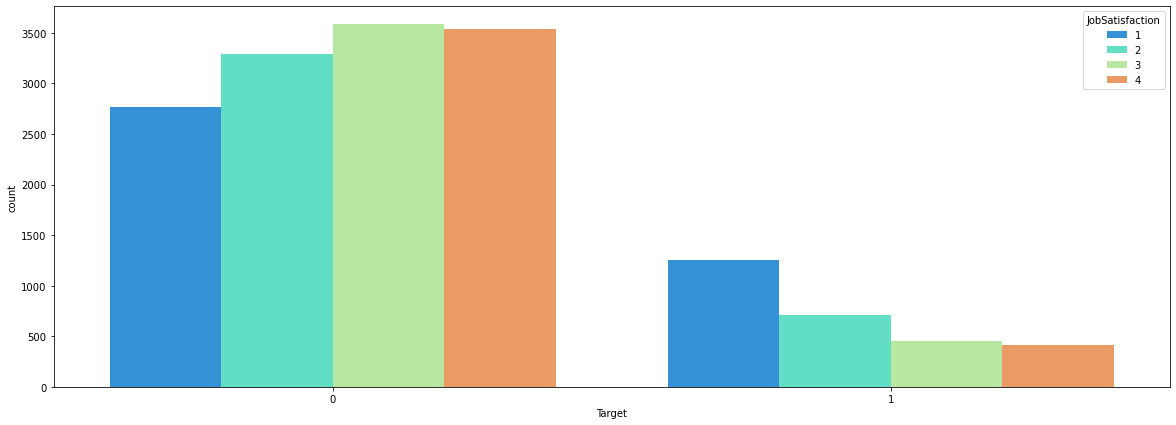

In [88]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='JobSatisfaction',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

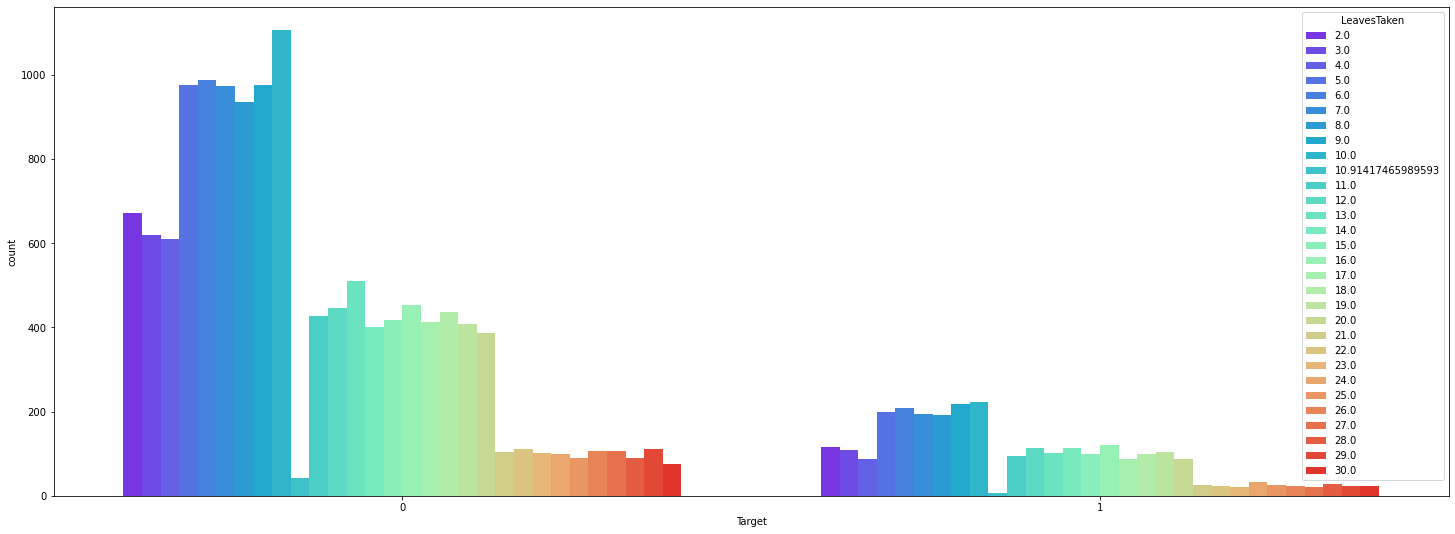

In [89]:
plt.figure(figsize=(25,9))
sns.countplot(x='Target',hue='LeavesTaken',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

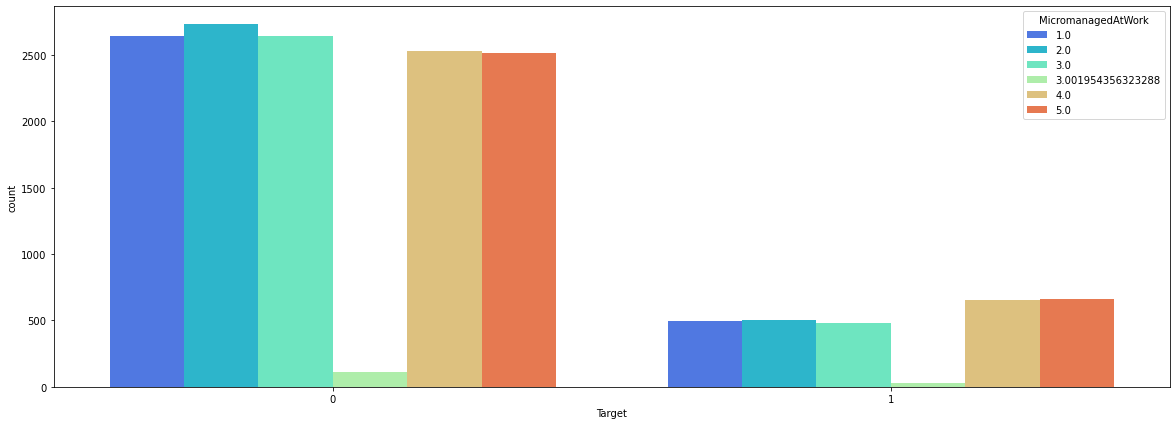

In [90]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='MicromanagedAtWork',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

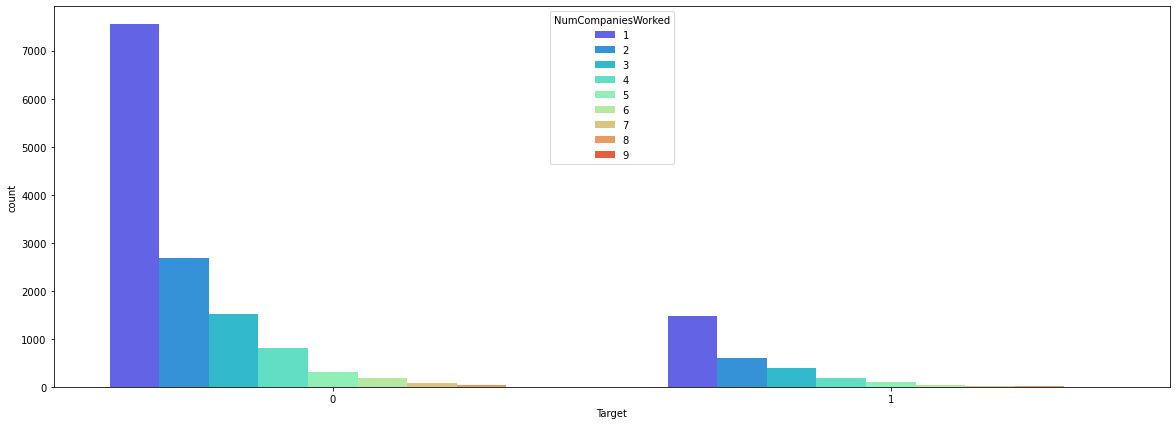

In [91]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='NumCompaniesWorked',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

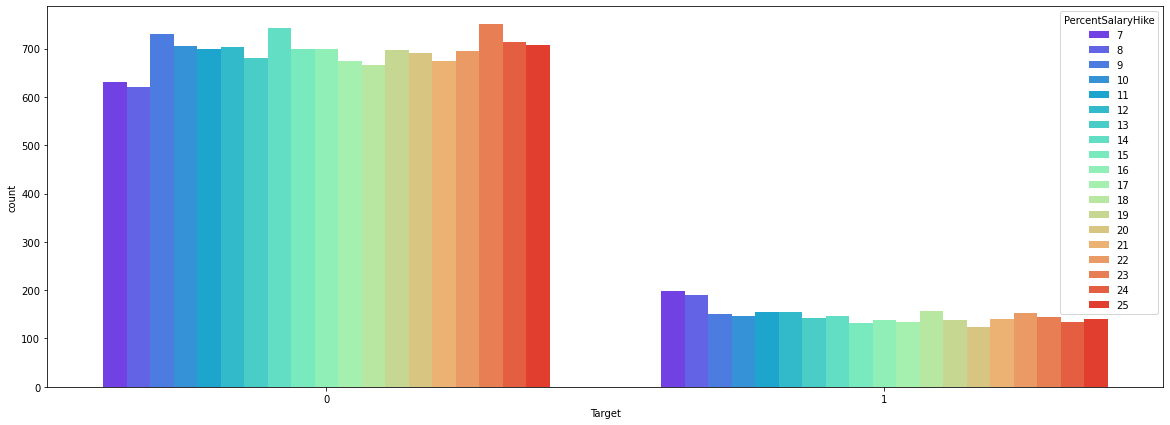

In [92]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='PercentSalaryHike',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

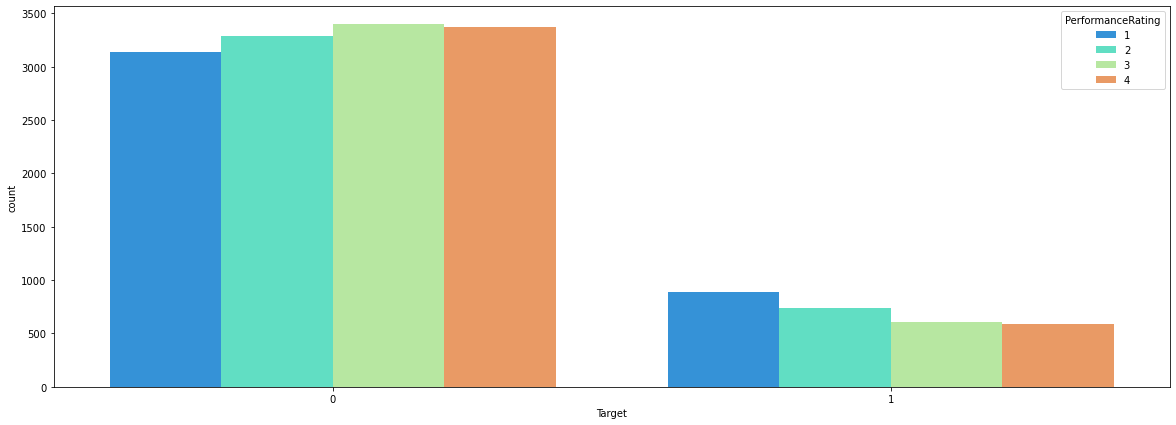

In [93]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='PerformanceRating',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

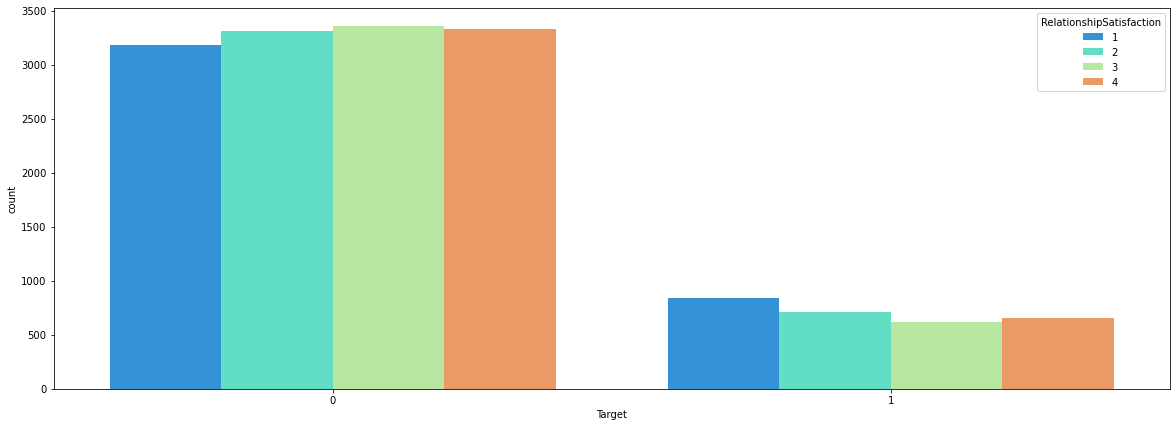

In [94]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='RelationshipSatisfaction',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

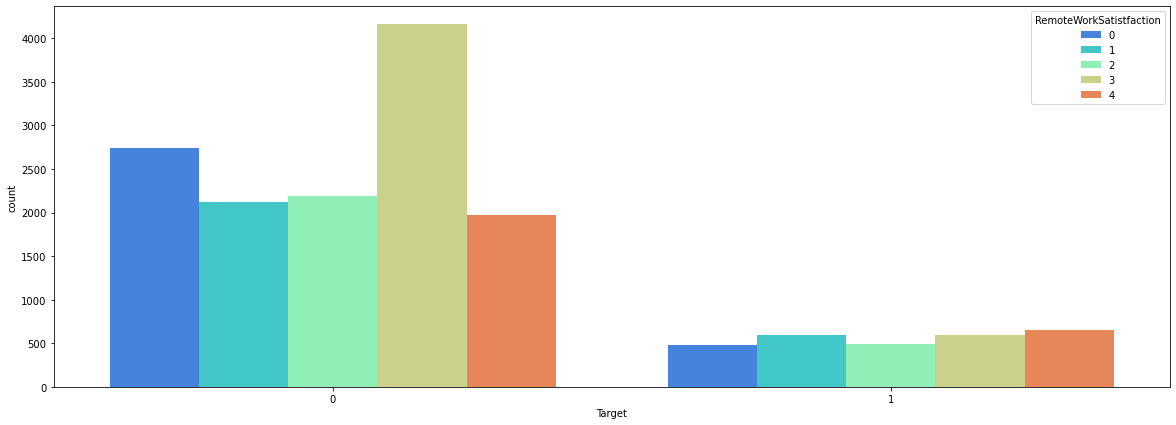

In [95]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='RemoteWorkSatistfaction',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

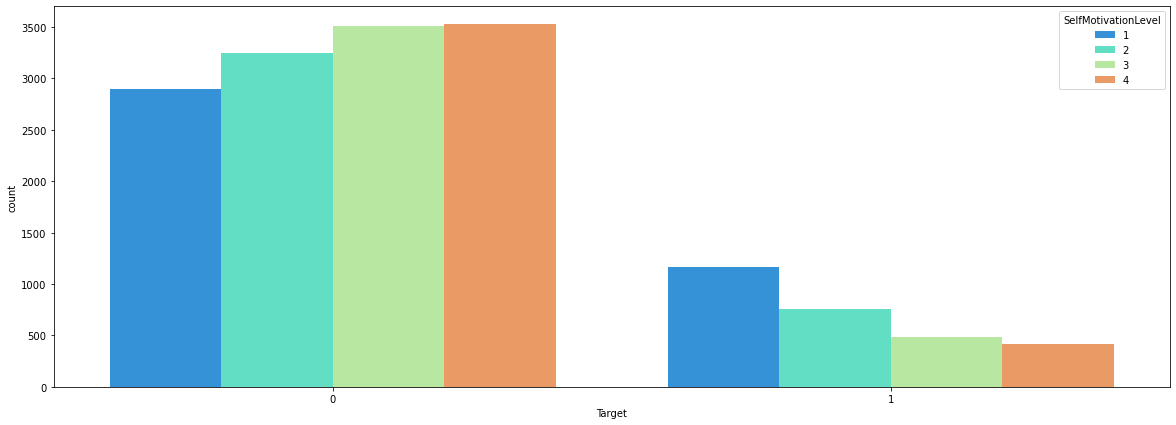

In [96]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='SelfMotivationLevel',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

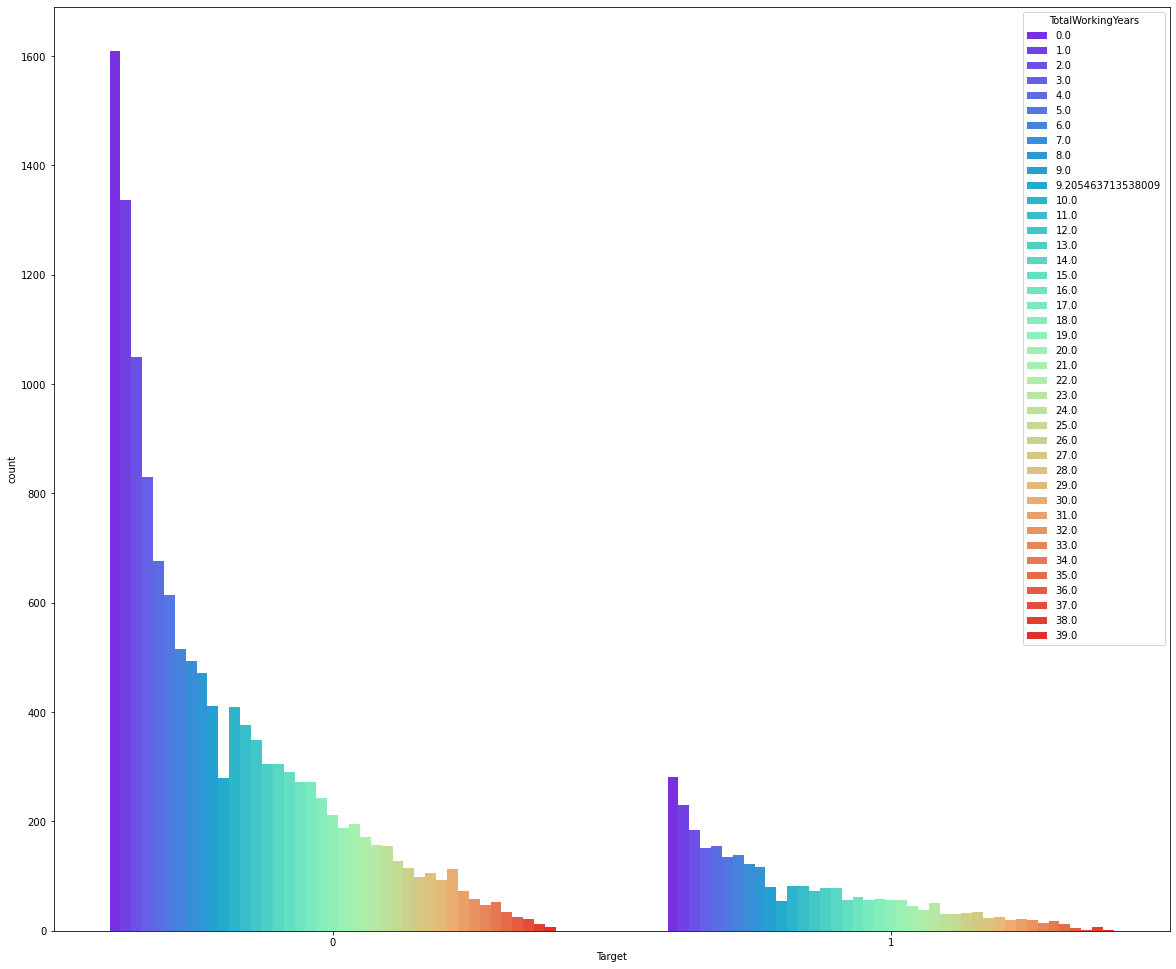

In [97]:
plt.figure(figsize=(20,17))
sns.countplot(x='Target',hue='TotalWorkingYears',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

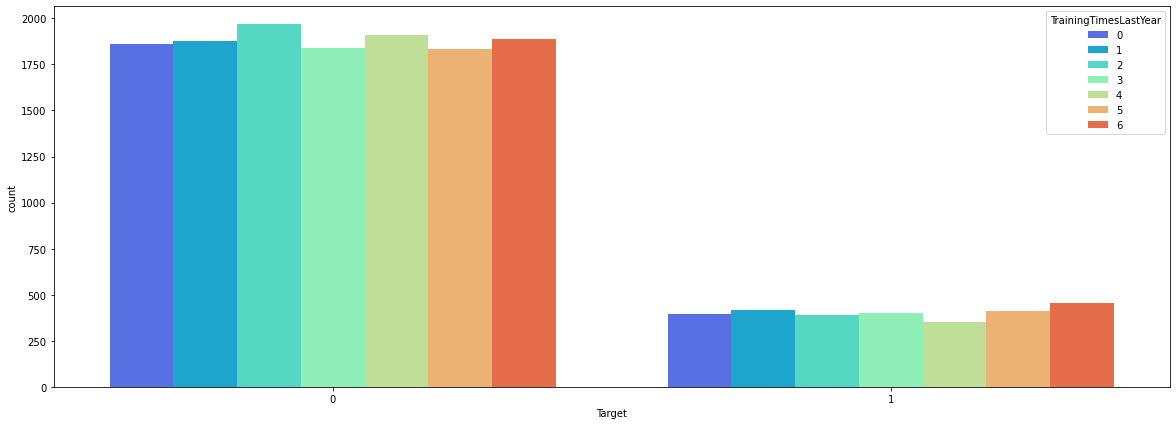

In [98]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='TrainingTimesLastYear',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

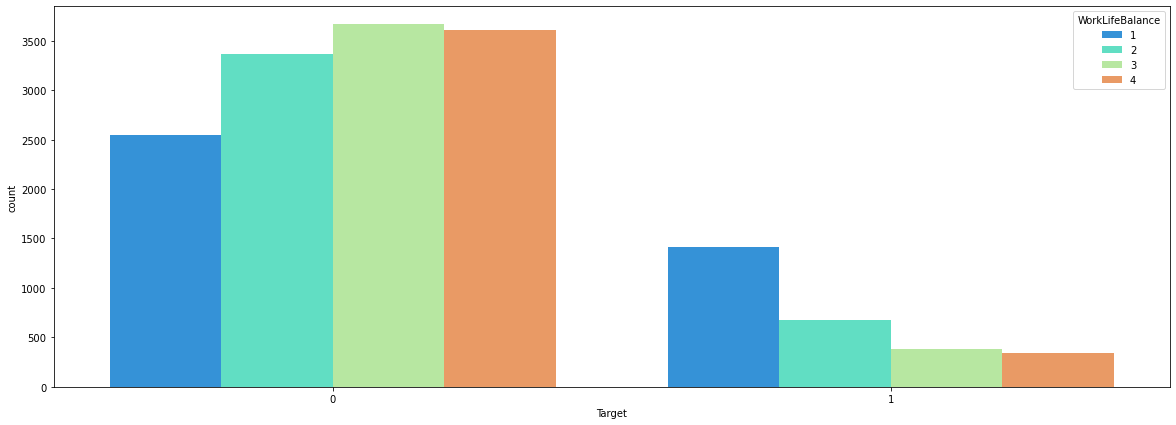

In [99]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='WorkLifeBalance',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

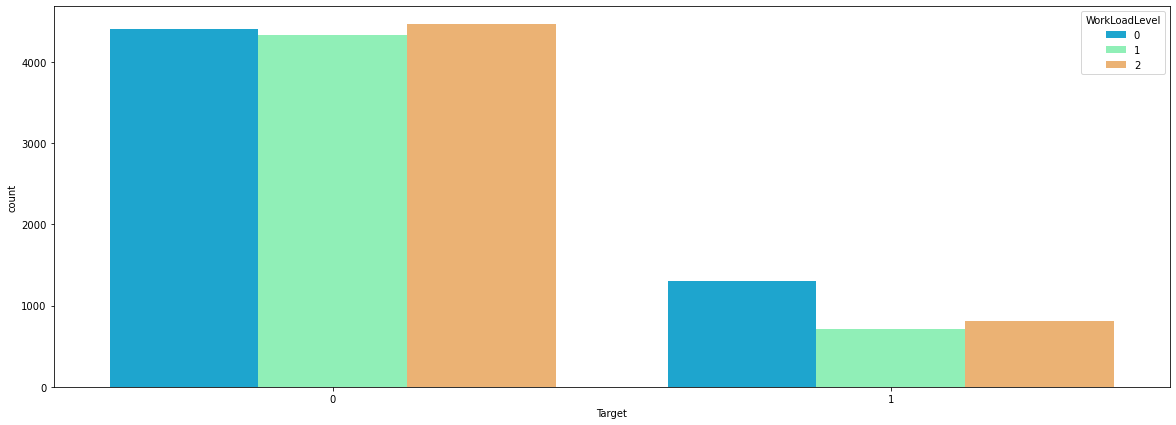

In [100]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='WorkLoadLevel',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

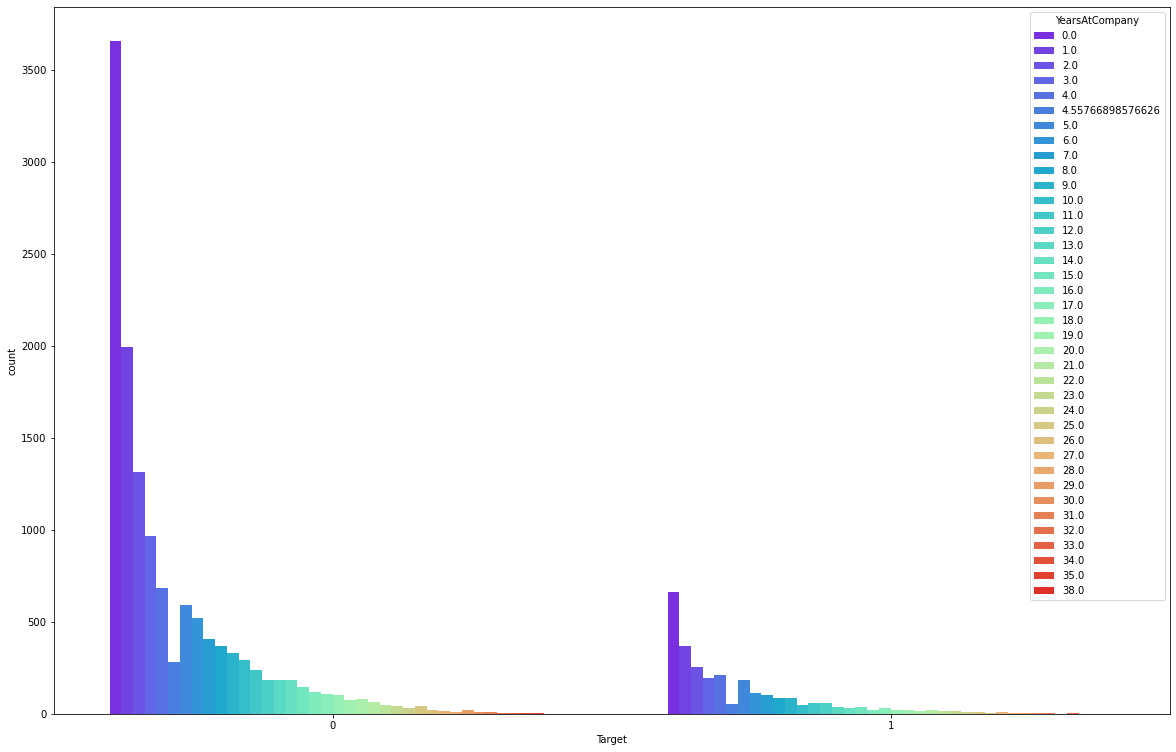

In [101]:
plt.figure(figsize=(20,13))
sns.countplot(x='Target',hue='YearsAtCompany',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

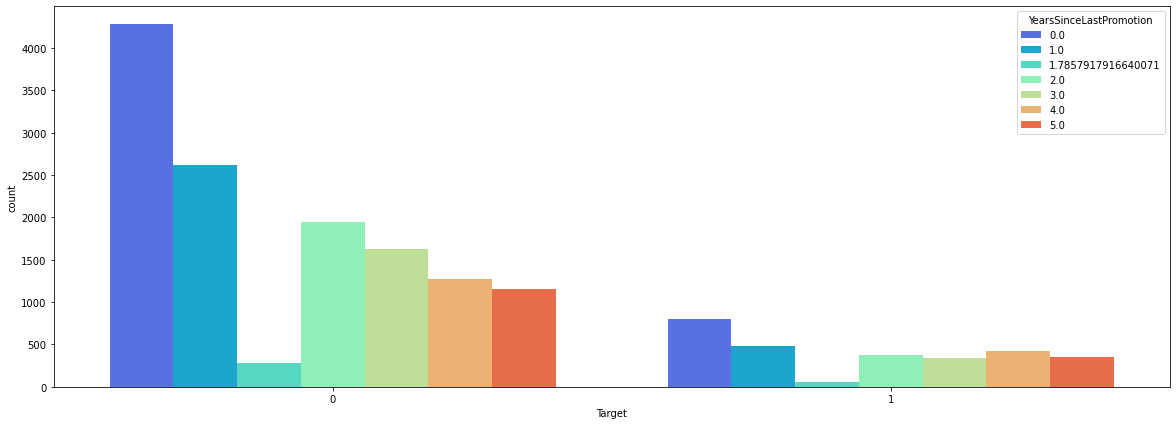

In [102]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='YearsSinceLastPromotion',data=train,palette='rainbow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

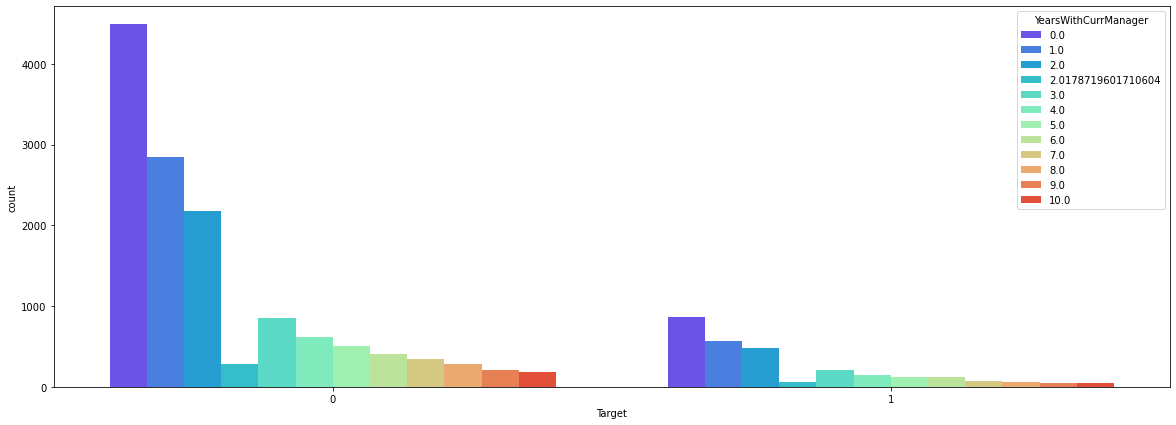

In [103]:
plt.figure(figsize=(20,7))
sns.countplot(x='Target',hue='YearsWithCurrManager',data=train,palette='rainbow')

In [104]:
train["Target"].value_counts()

0    13180
1     2820
Name: Target, dtype: int64

In [105]:
from sklearn.manifold import TSNE

In [106]:
train = train.sample(frac=1)
stress_train = df.loc[train['Target'] == 1]
non_stress_train = df.loc[train['Target'] == 0]

normal_distributed_df = pd.concat([stress_train ,non_stress_train])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7225,-0.167684,0.992207,-0.026752,-1.418493,-1.344624,1.348409,1.410983,-0.001389,0.255383,0.888696,-1.458137,-1.337521,-0.442268,0.457882,1.341514,1.495384,1.348506,2.833199,1.915453,1.648337
2238,-1.247401,0.662394,-0.097904,0.707851,-0.453591,-1.339338,0.789803,-0.001389,0.094490,-0.672474,-1.640336,0.453152,-1.336303,1.352181,0.886553,0.996205,-0.448454,1.627020,1.319520,-0.007398
3996,-0.866783,0.085222,-0.858682,0.707851,-0.453591,1.348409,-0.763147,1.419659,-0.313931,-0.672474,-0.364944,-1.337521,0.451767,1.352181,-0.933292,0.497026,-0.448454,-0.613026,-0.468279,-0.421331
1672,-1.369944,-1.481387,-0.097904,-0.000930,-1.344624,-0.443422,-1.229031,-1.422437,-0.301555,-0.672474,-1.458137,-0.442184,1.345802,1.352181,-0.933292,-0.002153,-1.346933,-0.613026,-0.468279,-0.421331
6620,-0.298671,-0.327043,-0.486503,1.416632,1.328474,-1.339338,-0.297262,-0.001389,-0.313931,-0.672474,-1.640336,-1.337521,-0.442268,-1.330718,-1.047032,1.495384,1.348506,-0.785338,-1.064213,-0.835265


In [107]:
new_df.shape

(16000, 20)

Class 0: 13180
Class 1: 2820
Proportion: 4.67 : 1


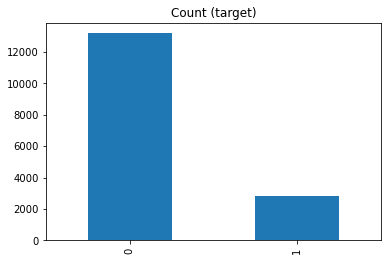

In [108]:
target_count = train.Target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [109]:
X

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,29
0,-1.731943,-0.244590,-0.721851,1.416632,-1.344624,-0.443422,-0.607852,-0.001389,-0.078780,1.669281,...,2.476204,1,2,5,0,1,4,0,1,2
1,-1.731726,-1.234028,0.389213,1.416632,-1.344624,1.348409,-0.297262,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,5,0,1,8,1,0,3
2,-1.731510,0.497488,-0.459137,-0.709712,0.437441,1.348409,2.032163,0.709135,0.181125,1.669281,...,3.304071,0,1,5,0,1,4,1,1,0
3,-1.731293,-0.821762,-0.366092,0.707851,1.328474,-1.339338,-0.607852,-0.711913,-0.301555,-0.672474,...,-0.421331,1,2,3,0,0,4,2,0,2
4,-1.731077,-0.739309,-0.256627,-0.000930,-0.453591,1.348409,-0.297262,1.419659,-0.091156,0.108111,...,-0.835265,0,0,1,0,1,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.731077,-1.646293,-0.524815,-0.709712,-1.344624,1.348409,-0.452557,0.709135,-0.313931,-0.672474,...,-0.835265,1,2,4,1,1,3,0,0,0
15996,1.731293,1.404473,-0.092431,-0.709712,-0.453591,0.452494,0.479213,-0.711913,-0.128285,-0.672474,...,-0.007398,0,2,5,0,0,7,2,2,1
15997,1.731510,-1.069121,-0.683539,-1.418493,1.328474,1.348409,-0.607852,-0.711913,-0.165414,-0.672474,...,-0.421331,0,0,4,0,1,6,2,0,0
15998,1.731726,-0.821762,-0.907941,0.707851,1.328474,-0.443422,-0.452557,-0.711913,-0.078780,0.888696,...,-0.421331,0,1,0,1,0,0,1,0,0


In [110]:
y

0        0
1        0
2        0
3        1
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: Target, Length: 16000, dtype: int64

In [111]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

# Remove 'id' and 'target' columns
labels = train.columns[2:]

X = train[labels]
y = train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Recall: \n',recall_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Recall: 
 0.5464285714285714
Precision: 0.8547486033519553
F1 Score: 0.6666666666666667
Roc Auc Score: 0.7633658008658009
Accuracy: 90.44%


In [112]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.44%


Confusion matrix:
 [[2588   52]
 [ 254  306]]


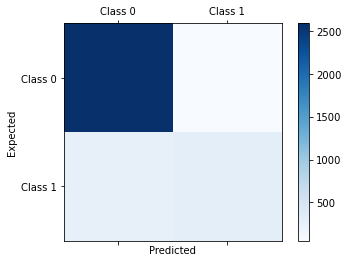

In [113]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [114]:
# Class count
count_class_0, count_class_1 = train.Target.value_counts()

# Divide by class
df_class_0 = train[train['Target'] == 0]
df_class_1 = train[train['Target'] == 1]

<IPython.core.display.Javascript object>

Random under-sampling:
1    2820
0    2820
Name: Target, dtype: int64


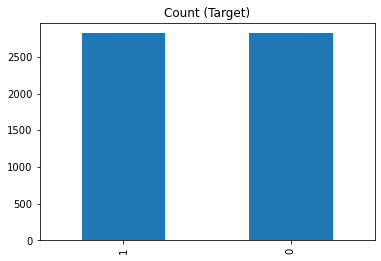

In [115]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Target.value_counts())

df_test_under.Target.value_counts().plot(kind='bar', title='Count (Target)');

<IPython.core.display.Javascript object>

Random over-sampling:
1    13180
0    13180
Name: Target, dtype: int64


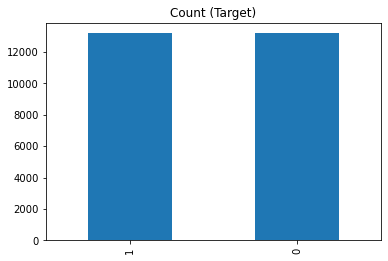

In [116]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Target.value_counts())

df_test_over.Target.value_counts().plot(kind='bar', title='Count (Target)');

In [117]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

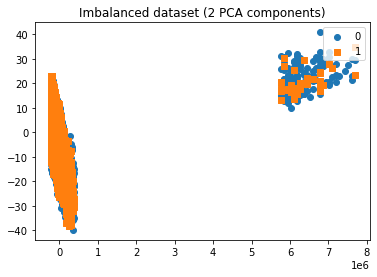

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [120]:
gnb = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.44%


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [122]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
accuracy=confusion_matrix(y_test,y_pred)

In [125]:
accuracy

array([[6522,   57],
       [1404,   17]], dtype=int64)

In [126]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.817375

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6579
           1       0.23      0.01      0.02      1421

    accuracy                           0.82      8000
   macro avg       0.53      0.50      0.46      8000
weighted avg       0.72      0.82      0.74      8000



In [129]:
predictions = gnb.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
accuracy


array([[6522,   57],
       [1404,   17]], dtype=int64)

In [130]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.817375

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6579
           1       0.23      0.01      0.02      1421

    accuracy                           0.82      8000
   macro avg       0.53      0.50      0.46      8000
weighted avg       0.72      0.82      0.74      8000

